In [1]:
%pylab inline
import pandas as pd
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit
import PyNAFF as pnf

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.fft import *

In [3]:
%matplotlib notebook

In [4]:
def DF(file):
    df = pd.read_fwf(file)
    pd.set_option('display.max_column', None)
    #pd.set_option('display.max_rows', None)
    display(df)

In [5]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [6]:
def collector(arr):
    
    n = arr[0,1]
    arr = arr.astype('object')
    t = append('turn', arr[:,0])
    p = append('polarization', arr[:,3])
    x = append('x',arr[:,13])
    px = append('px',arr[:,14])
    y = append('y',arr[:,15])
    py = append('py',arr[:,16])
    z = append('z',arr[:,17])
    pz = append('pz',arr[:,18])

    return n, t, p, x, px, y, py, z, pz

In [7]:
def deci2d(x,y):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

In [8]:
def plotter(x,y):
    figure(figsize=(10, 8))

    plot(x[2:],y[2:],'.', color = 'gold')
    plot(x[1],y[1],'o', color = 'red', label = 'initial position')

    xlabel('%s'%x[0],size =20)
    ylabel('%s'%y[0],size =20)
    title(' %s vs %s'%(y[0],x[0]),size = 20)
    deci2d(x[1:],y[1:])
    legend(loc = 'best', fontsize =15)
    show()

In [9]:
def FFT(x,y):
    N = len(x[1:])+1
    T = 1
    xx = x[1:]
    yy = y[1:]
    yf = fft(yy)
    xf = fftfreq(N, T)[:N//2]
    figure(figsize=(10, 8))
    plot(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-', color = 'orange')
    xlabel('frequency',size = 20)
    title('%s'%y[0], size = 25)
    #legend(['FFT'], fontsize = 20)
    show()

In [10]:
def PMA(file):
    arr = readf(file)
    n, t, p, x, px, y, py, z, pz = collector(arr)
    plotter(t,x)
    FFT(t,x)
    plotter(t,y)
    FFT(t,y)
    plotter(t,z)
    FFT(t,z)

<IPython.core.display.Javascript object>


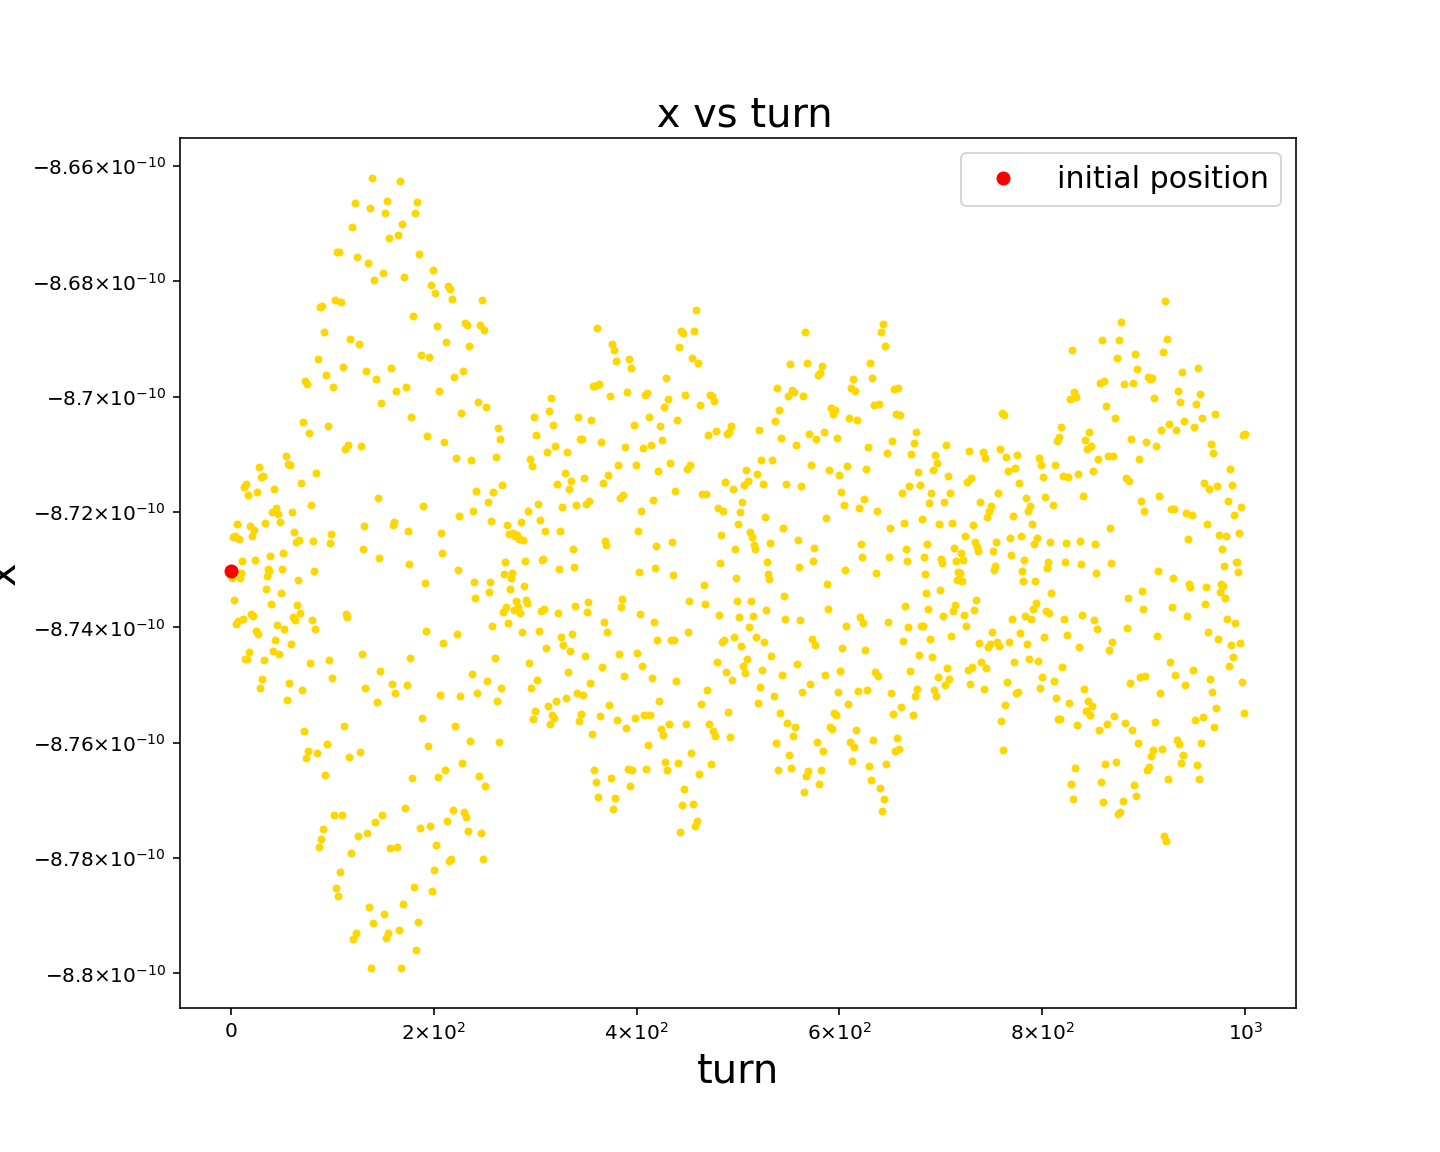

<IPython.core.display.Javascript object>


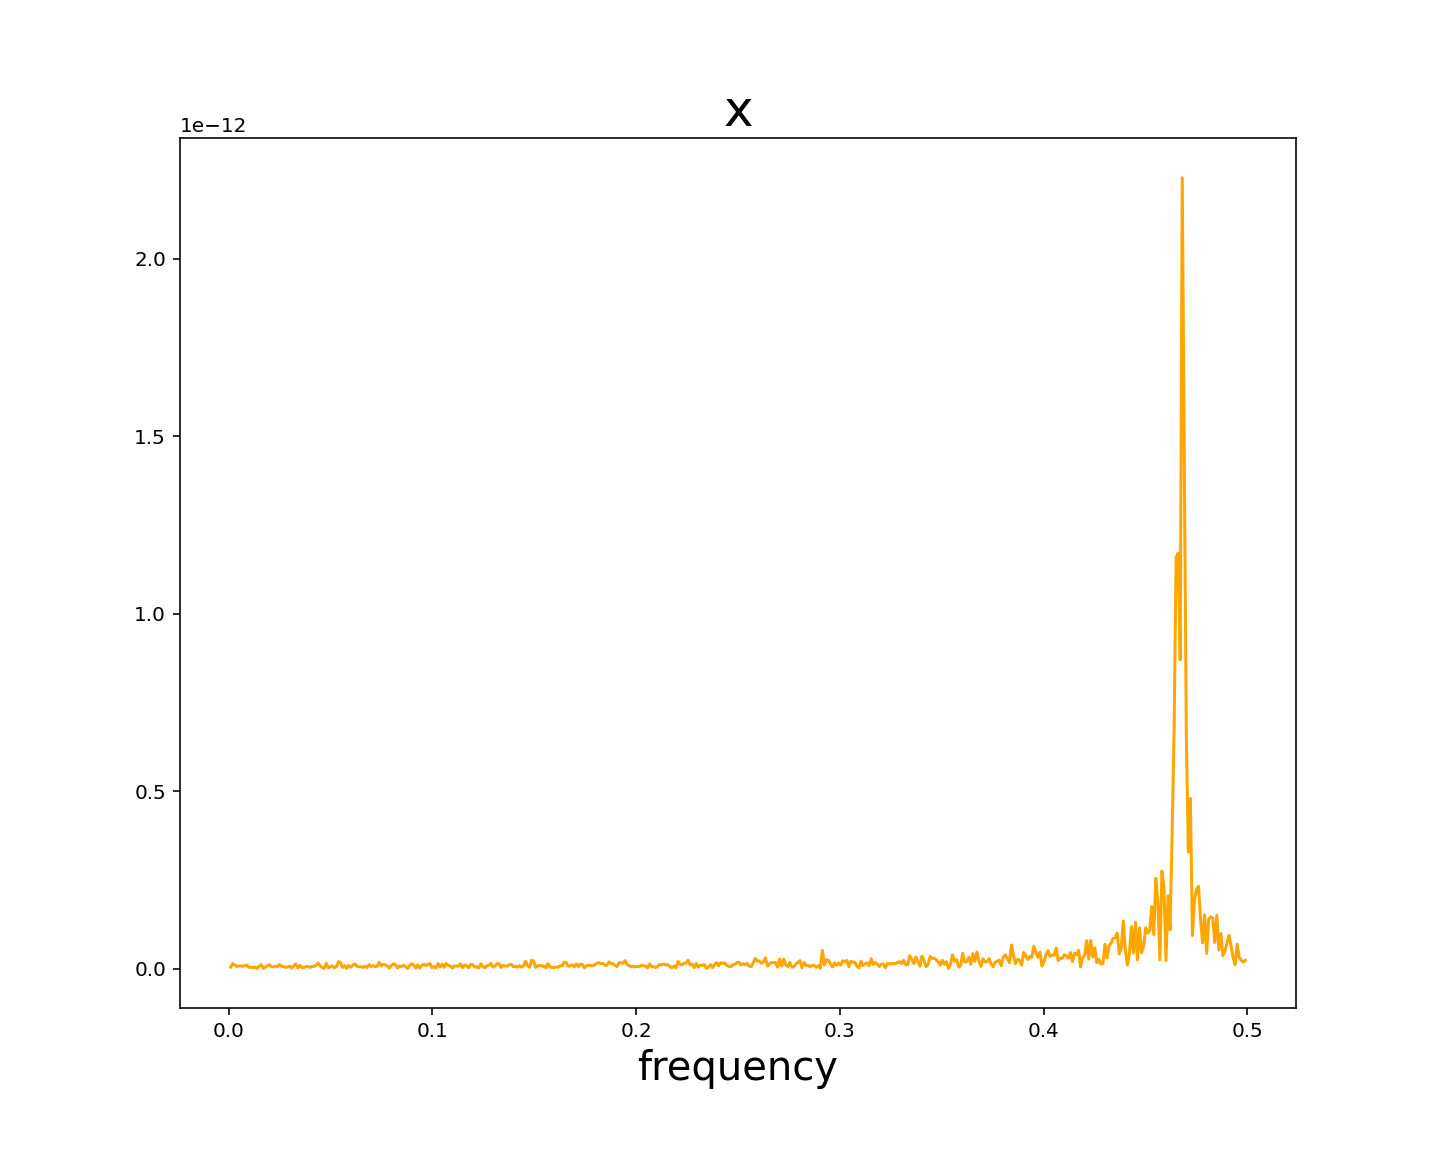

<IPython.core.display.Javascript object>


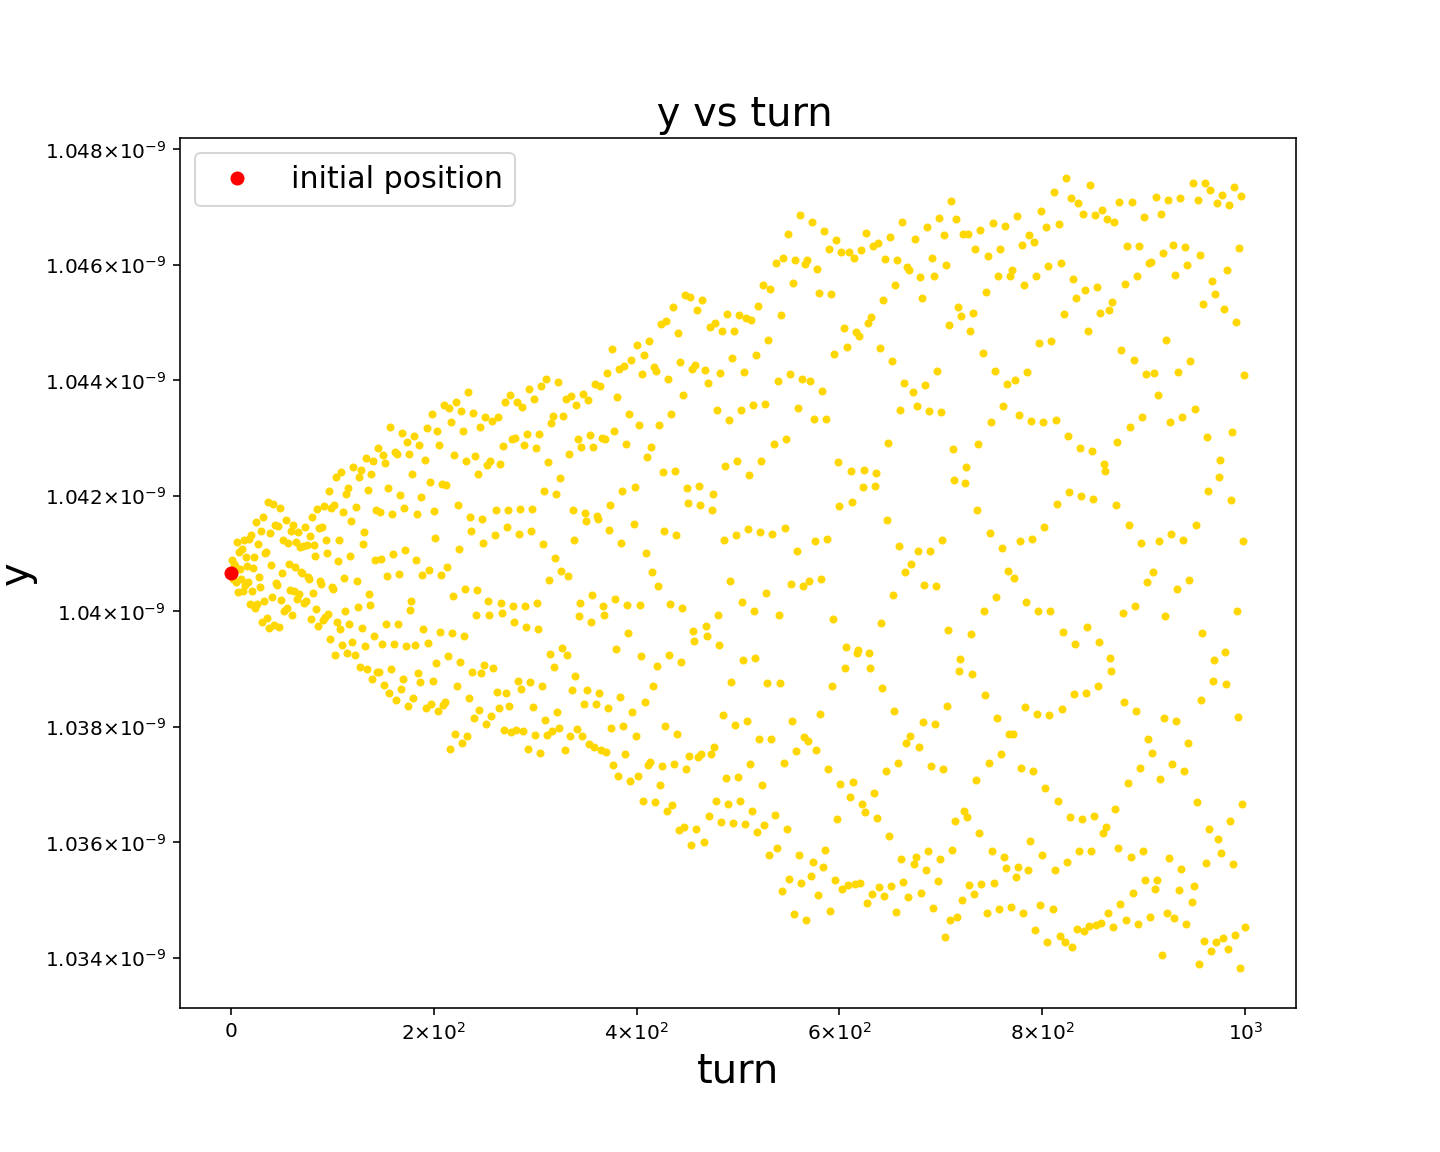

<IPython.core.display.Javascript object>


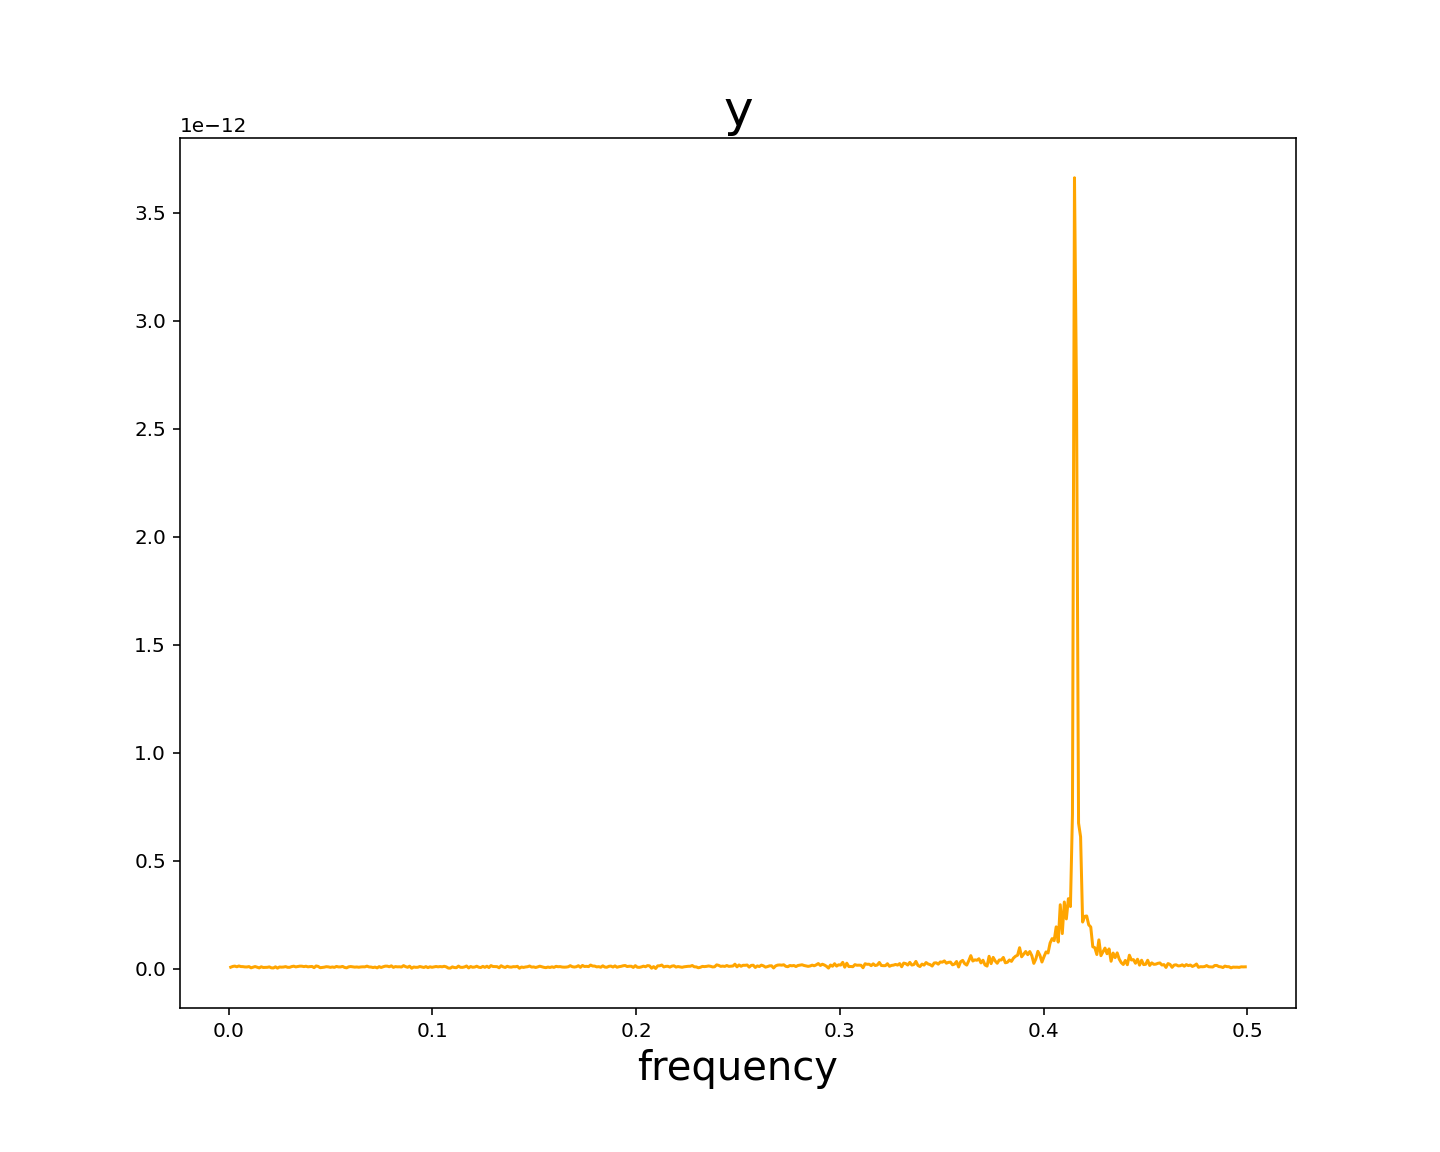

<IPython.core.display.Javascript object>


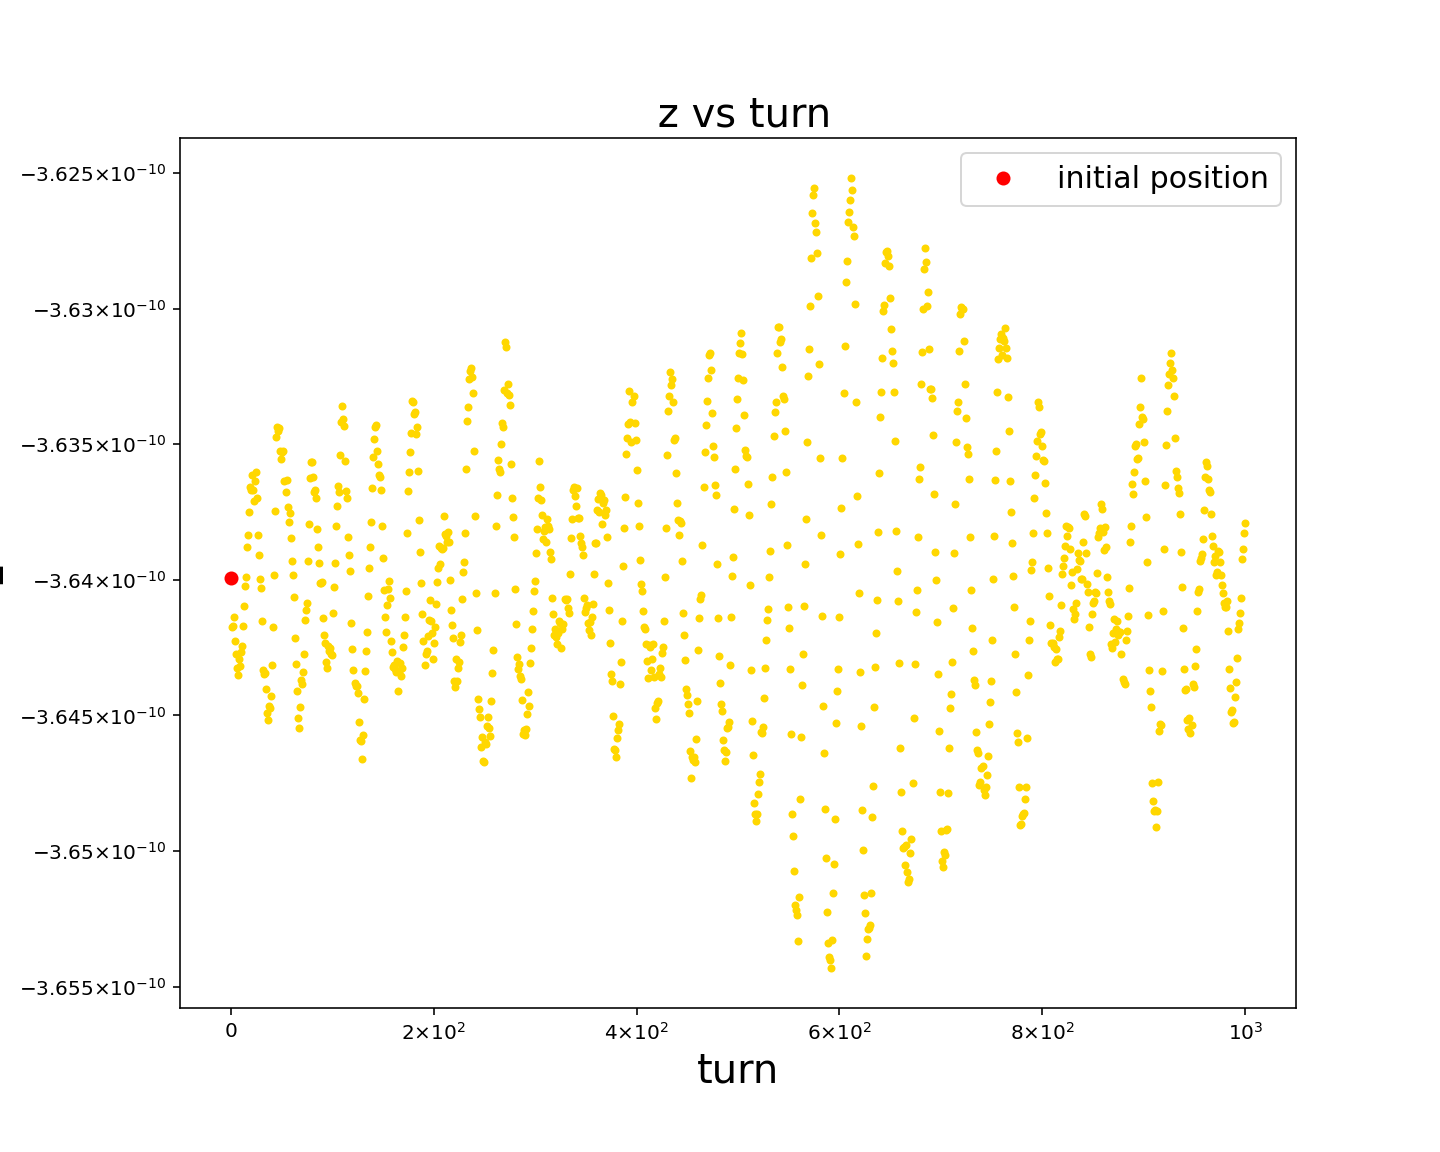

<IPython.core.display.Javascript object>


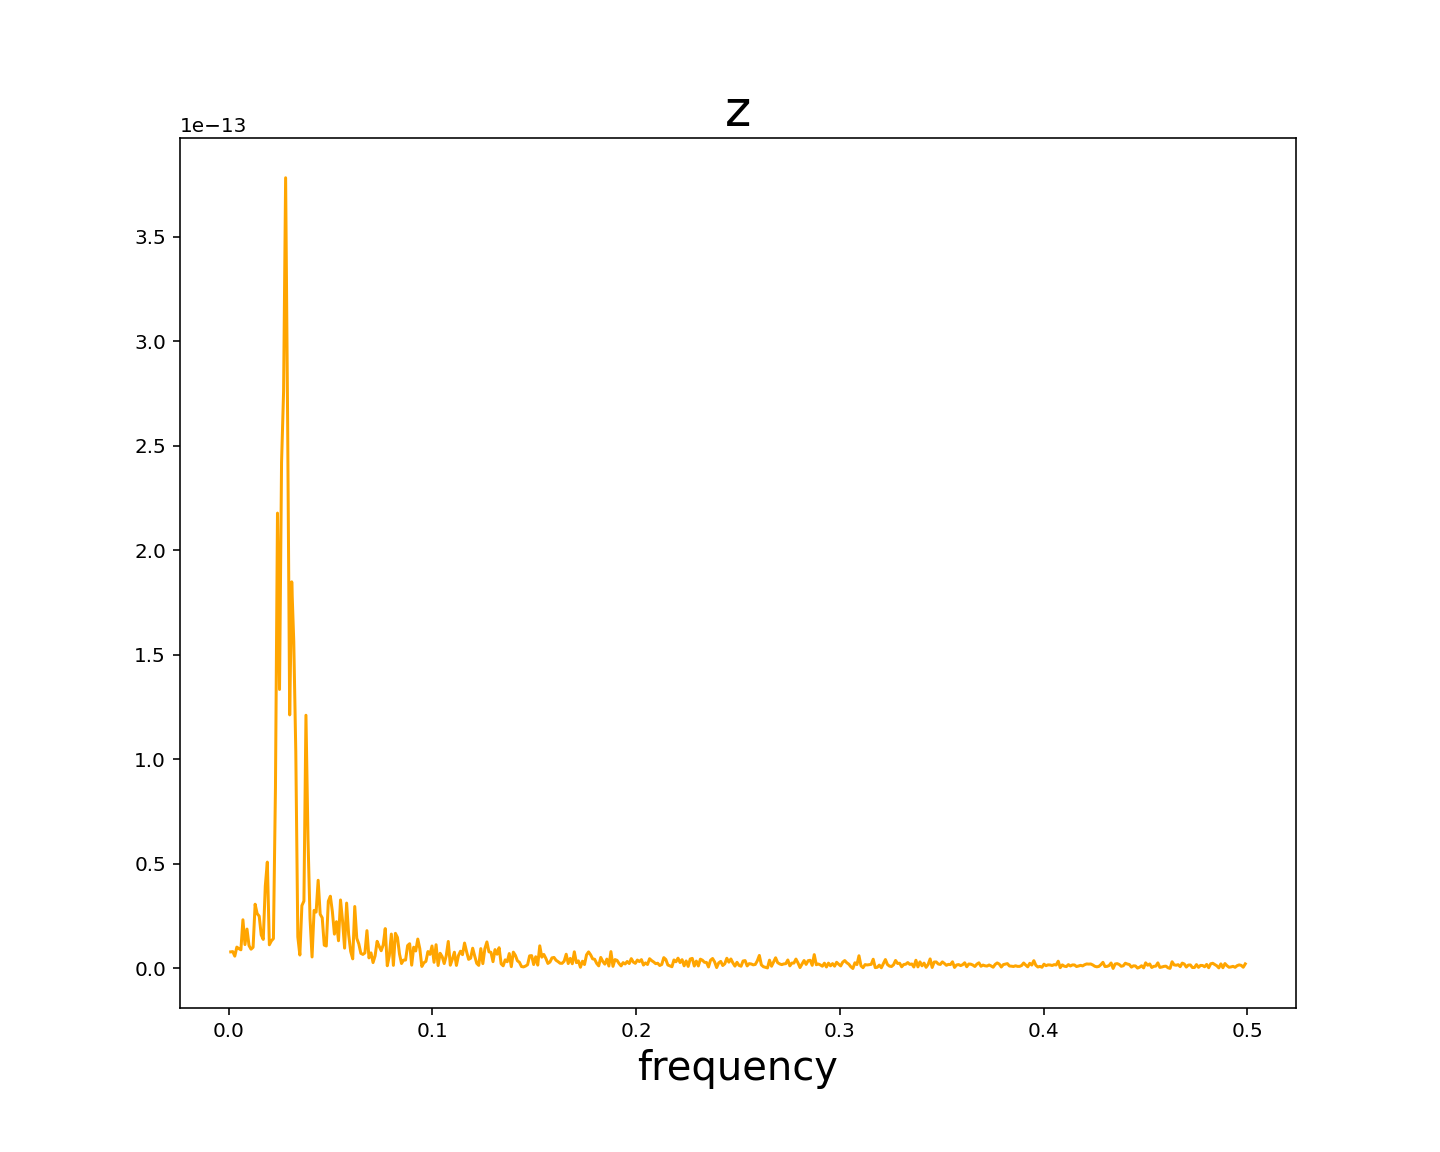

In [11]:
PMA('her_0-0.txt')

In [12]:
def NAFF(file):
    
    arr = readf(file)
    n, t, p, x, px, y, py, z, pz = collector(arr)
    fx1 = pnf.naff(x[1:501]-mean(x[1:501]), 500, 1, 0 , False, window=1)[0][1]
    fy1 = pnf.naff(y[1:501]-mean(y[1:501]), 500, 1, 0 , False, window=1)[0][1]
    fx2 = pnf.naff(x[501:]-mean(x[501:]), 500, 1, 0 , False, window=1)[0][1]
    fy2 = pnf.naff(y[501:]-mean(y[501:]), 500, 1, 0 , False, window=1)[0][1]
    dx = fx2 - fx1
    dy = fy2 - fy1
    Dif = log10(sqrt(dx**2+dy**2))

    '''print('x0:',x[1])
    print('y0:',y[1])
    print('fx1:',fx1)
    print('fy1:',fy1)
    print('fx2:',fx2)
    print('fy2:',fy2)
    print('delta_x:',dx)
    print('delta_y:',dy)
    print('D:',Dif)'''
    
    return x[1],y[1],Dif

In [13]:
NAFF('her-0-0.txt')

(8.964303999999999e-08, 1.035515e-09, -3.2228741273114907)

In [14]:
NAFF('her-0-5.txt')

(-8.730154e-10, 1.185915e-07, -7.214819720107519)

In [15]:
NAFF('her-0-10.txt')

(-8.730154e-10, 2.3614219999999998e-07, -6.749309172319642)

In [16]:
NAFF('her-0-15.txt')

(-8.730154e-10, 3.53693e-07, -7.208471799627505)

In [17]:
NAFF('her-0-20.txt')

(-8.730154e-10, 4.712438e-07, -6.762873211789671)

In [18]:
NAFF('her-0-25.txt')

(-8.730154e-10, 5.887946e-07, -6.534163106605548)

In [19]:
NAFF('her-0-30.txt')

(-8.730154e-10, 7.063454000000001e-07, -4.1385145121320654)

In [78]:
def isfloat(num):
    
    try:
        float(num)
        return float(num)
    
    except ValueError:
        return False

In [88]:
def dc(flist):
    
    X = []
    Y = []
    D = []    
    
    for i in range(len(flist)):
        
        if flist[i] == 'her-30-0.txt':
            X.append(0.0004891649884796539)
            Y.append(0)
            D.append(0)
            
        elif flist[i] == 'her-30-5.txt':
            X.append(0.0004891649884796539)
            Y.append(1.1755078350866065e-07)
            D.append(0)
            
        elif 'her-40' in flist[i]:
            name = []
            for j in range(len(flist[i])):
                name.append(flist[i][j])
            name = array(name)
            ii = where(name == '-')[0][1]
            ie = where(name == '.')[0][0]
            num = isfloat(flist[i][ii+1:ie])
            X.append(0.0006522199846395385)
            Y.append(2.3510156701732128e-08*num)
            D.append(0)
        
        else:
            X.append(NAFF(flist[i])[0])
            Y.append(NAFF(flist[i])[1])
            D.append(NAFF(flist[i])[2])
        
    X = array(X)/1.6305499615988464e-05
    Y = array(Y)/2.3510156701732128e-08
    D = array(D)
    
    return X,Y,D

In [94]:
flist = ['her-0-0.txt','her-0-5.txt','her-0-10.txt','her-0-15.txt','her-0-20.txt','her-0-25.txt','her-0-30.txt','her-0-40.txt',\
       'her-5-0.txt','her-5-5.txt','her-5-10.txt','her-5-15.txt','her-5-20.txt','her-5-25.txt','her-5-30.txt','her-5-40.txt',\
       'her-10-0.txt','her-10-5.txt','her-10-10.txt','her-10-15.txt','her-10-20.txt','her-10-25.txt','her-10-30.txt','her-10-40.txt',\
       'her-15-0.txt','her-15-5.txt','her-15-10.txt','her-15-15.txt','her-15-20.txt','her-15-25.txt','her-15-30.txt','her-15-40.txt',\
       'her-20-0.txt','her-20-5.txt','her-20-10.txt','her-20-15.txt','her-20-20.txt','her-20-25.txt','her-20-30.txt','her-20-40.txt',\
       'her-25-0.txt','her-25-5.txt','her-25-10.txt','her-25-15.txt','her-25-20.txt','her-25-25.txt','her-25-30.txt','her-25-40.txt',\
       'her-30-0.txt','her-30-5.txt','her-30-10.txt','her-30-15.txt','her-30-20.txt','her-30-25.txt','her-30-30.txt','her-30-40.txt',\
       'her-40-0.txt','her-40-5.txt','her-40-10.txt','her-40-15.txt','her-40-20.txt','her-40-25.txt','her-40-30.txt','her-40-40.txt']

'''flist = ['r_her-5-5.txt','r_her-5-10.txt','r_her-5-15.txt',\
        'r_her-10-5.txt','r_her-10-10.txt','r_her-10-15.txt',\
        'r_her-15-5.txt','r_her-15-10.txt','r_her-15-15.txt']'''

"flist = ['r_her-5-5.txt','r_her-5-10.txt','r_her-5-15.txt',        'r_her-10-5.txt','r_her-10-10.txt','r_her-10-15.txt',        'r_her-15-5.txt','r_her-15-10.txt','r_her-15-15.txt']"

In [95]:
X,Y,D = dc(flist)

In [96]:
def FP(X,Y,D):
    figure(figsize=(10, 8))
    im = imshow(D.reshape(8,8).T[::-1], extent=(amin(X),amax(X),amin(Y),amax(Y)),\
                cmap=get_cmap('jet'),aspect='auto',vmin = -10, vmax = -2)
    colorbar(im)
    xlabel(r'x/$\sigma_{x}$', size = 20)
    ylabel(r'y/$\sigma_{y}$', size = 20)
    title(r'Amplitude-dependent diffusion', size = 25)
    show()

<IPython.core.display.Javascript object>


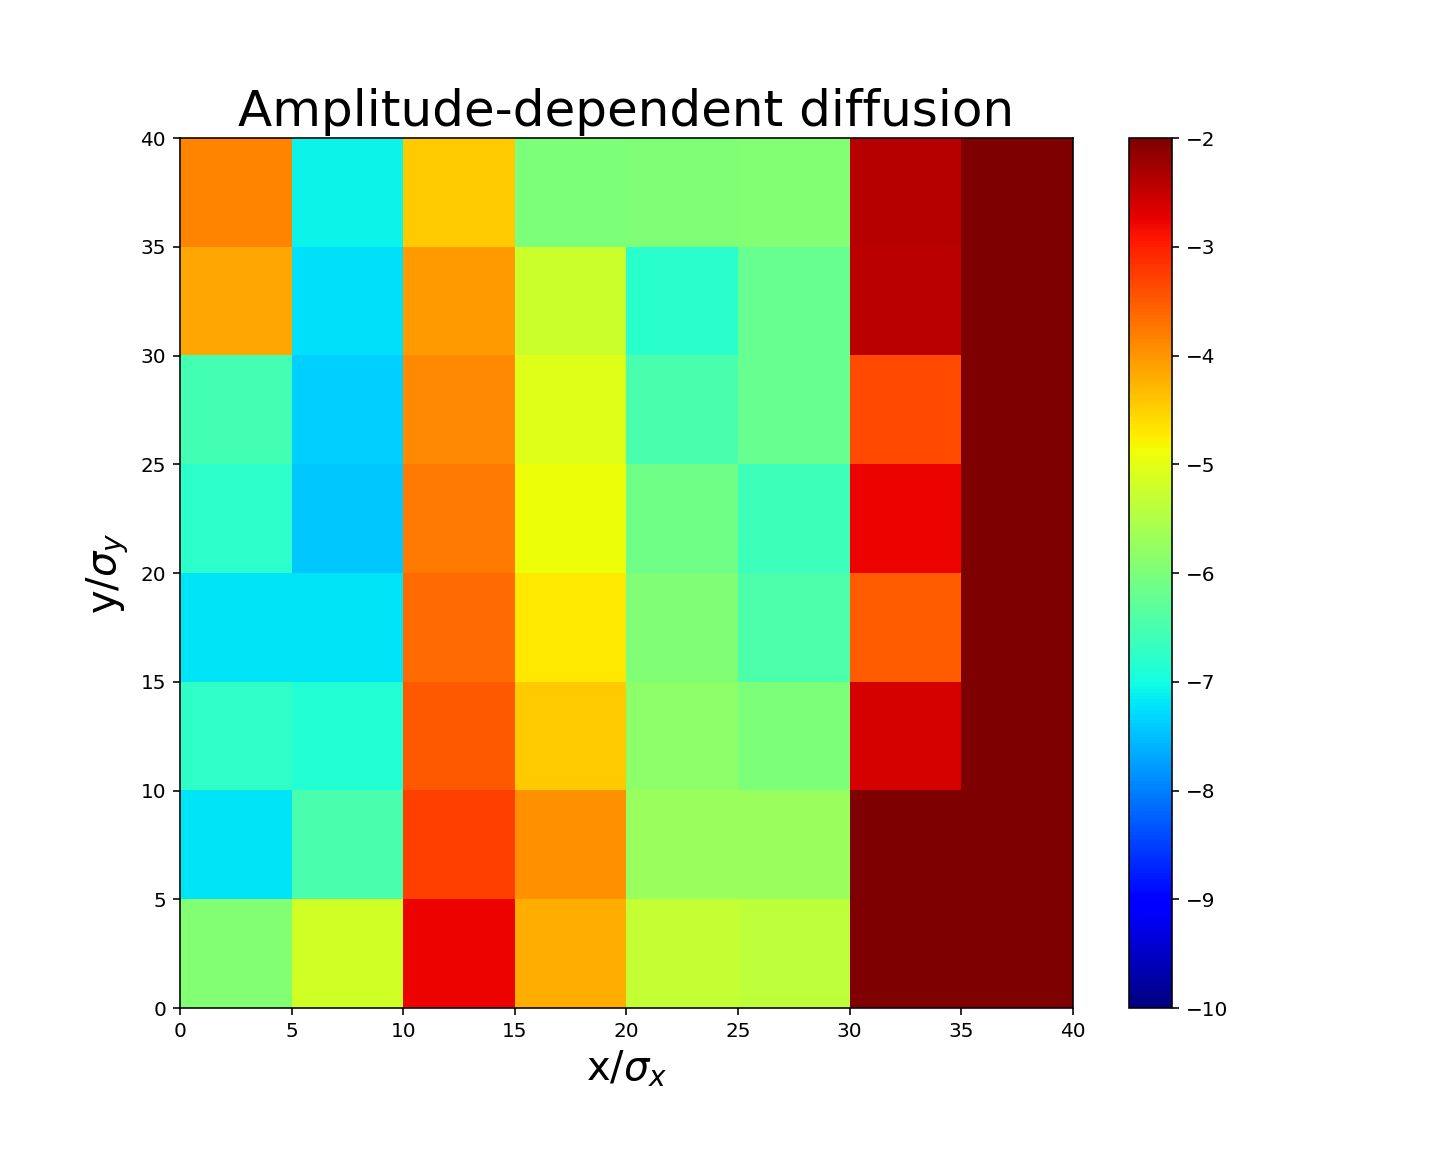

In [97]:
FP(X,Y,D)